# ObsID : 0945070133, SRCNUM : 10, Instru : EMOS2
**Simbad :** Star *2MASS J03332989-2714334* (https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4013058032&Name=2MASS%20J03332989-2714334&submit=submit)

## ESASky
https://sky.esa.int/esasky/?target=53.37579166666667%20-27.242833333333333&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033329.9-271434
- IAU name : 4XMM J033329.9-271433
- RA : 03h 33m 29.959s
- DEC : -27° 14' 34.10"

``GAIA``
- Designation : Gaia DR3 5060545834987968640
- RA : 03h 33m 29.937s
- DEC : -27° 14' 33.44"
- Parallax : 1.9836 mas
- G : 17.5984

``2MASS``
- Name : 03332989-2714334
- RA : 03h 33m 29.898s
- DEC : -27° 14' 33.48"

In [3]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945070133_SRCNUM10_EMOS2_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.515e-03 +/- 6.674e-04 (70.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-31
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 8678 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945070133_SRCNUM10_EMOS2_background_spectrum.fits
  Background Exposure Time: 8679 sec
 Using Response (RMF) File            ObsID0945070133_SRCNUM10_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945070133_SRCNUM10_EMOS2.arf



In [4]:
n_cts = 2.515e-03*8678

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 21.82517

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [7]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.000001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

***Warning: Fit is not current.
     3 channels (1-3) ignored in spectrum #     1
      No channels ignored (no channels in specified range)

Fit statistic  : C-Statistic                 62.2755     using 28 bins.

Test statistic : Chi-Squared                 23.5138     using 28 bins.
 Null hypothesis probability of 5.4758e-01 with 25 degrees of freedom
 Current data and model not fit yet.



(-0.5, 855.5, 660.5, -0.5)

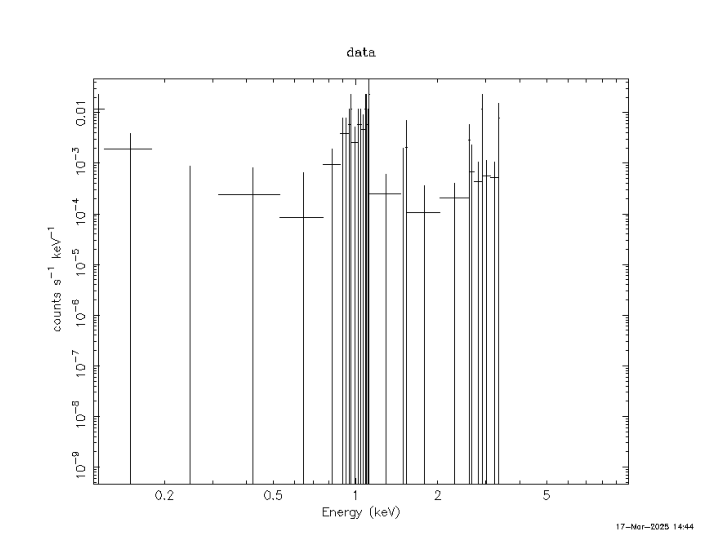

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              5.225900e+06     using 28 bins.

Te


***XSPEC Error:  No variable parameters for fit 

Exception: Error executing command: fit

### Bremsstrahlung model

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.295366e+06     using 28 bins.

Test statistic : Chi-Squared              5.065955e+10     using 28 bins.
 Null hypothesis probability of 0.000000e+00 with 25 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
68356.1      241216       -3      0.461942      0.614154      0.266546
25469.4      59481        -4      0.226069       191.829     0.0200353
232.368      214203       -5       58.4009       51.4246    0.00426392



***XSPEC Error:  No variable parameters for fit 

Exception: Error executing command: fit

### Apec model

In [13]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                483758.8     using 28 bins.

Test statistic : Chi-Squared              7.128972e+09     using 28 bins.
 Null hypothesis probability of 0.000000e+00 with 25 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
234215       139712       -3      0.164522       39.6744      0.321645
240.284      129654 

(-0.5, 856.5, 657.5, -0.5)

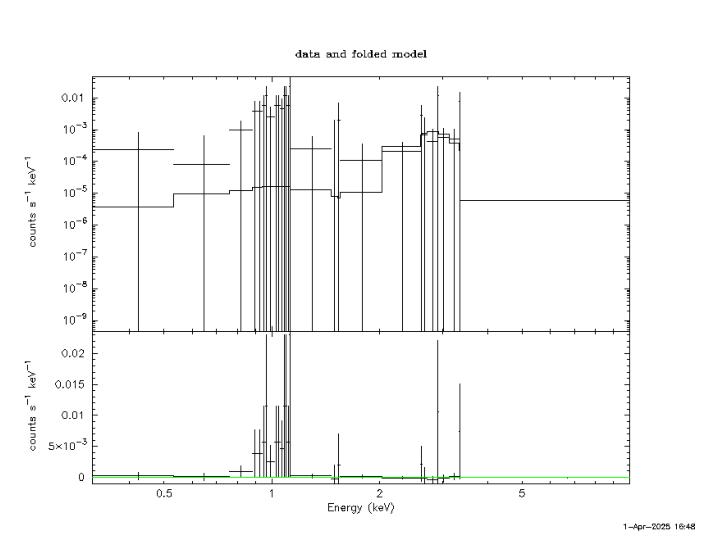

In [9]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              3.100578e+06     using 28 bins.

Test statistic : Chi-Squared              3.346067e+11     using 28 bins.
 Null hypothesis probability of 0.000000e+00 with 25 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
62.2755      777130       -3       56091.0       8.87296       150290.
***Warning: Zero alpha-matrix diagonal element for parameter 1
***Warning: Zero alpha-matrix diagonal element for parameter 2
***Warning: Ze


***XSPEC Error:  No variable parameters for fit 

Exception: Error executing command: fit

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** (GAIA)

- RA = 53.3748310°
- Dec = -27.2428069°

53.37 -27.24

**Column density :** nH = 2*10^20 cm^-2

In [12]:
print("The model give a column density of :")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")

The model give a column density of :

apec
(tbabs) : 5.2590052882762344e+23


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Apec`` with C-statistic = 50.3568 using 28 bins: **2.4852e-14 ergs/cm^2/s**.

In [4]:
Flux = 2.4852e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Apec : F_x-ray = {Flux} ergs/cm^2/s")

X-ray flux : 
Apec : F_x-ray = 2.4852e-14 ergs/cm^2/s


### Optical flux

In [5]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 17.5984

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 9.590236099191845e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [6]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 0.025913856283573913


## Luminosity

In [7]:
"""GAIA"""

P_mas = 1.9836 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity : "+color.END)
print(f"Apec : L_x-ray = {Luminosity} erg/s")

(GAIA)
Distance : d = 1.5556059689453518e+21 cm
Luminosity : 
Apec : L_x-ray = 7.557365222518324e+29 erg/s
